In [1]:
%autosave 0

Autosave disabled


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

Let's read in our clean dataset from the previous lesson.

In [2]:
df = pd.read_csv('stores.csv', index_col=0)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


As some of you have noticed, datetime objects will be read in as strings from csv files. Let's set our index as the proper datetime datatype.

In [3]:
df.index = pd.to_datetime(df.index)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


Let's decide how to split our data into train/validate/test subsets before we begin exploration.

In [4]:
df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [5]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((547500, 8), (183000, 8), (182500, 8))

Let's do some exploration without time!

### Does store location affect total sales?

In [6]:
train.store_address.nunique()

10

In [7]:
store_sums = train.groupby('store_address').sale_amount.sum().sort_values(ascending=True)
store_sums

store_address
12018 Perrin Beitel Rd     1852468
1520 Austin Hwy            2024724
1015 S WW White Rd         2025504
12125 Alamo Ranch Pkwy     2406336
516 S Flores St            2796994
735 SW Military Dr         2803588
8503 NW Military Hwy       2991622
2118 Fredericksburg Rdj    3030559
15000 San Pedro Ave        3267598
9255 FM 471 West           3414219
Name: sale_amount, dtype: int64

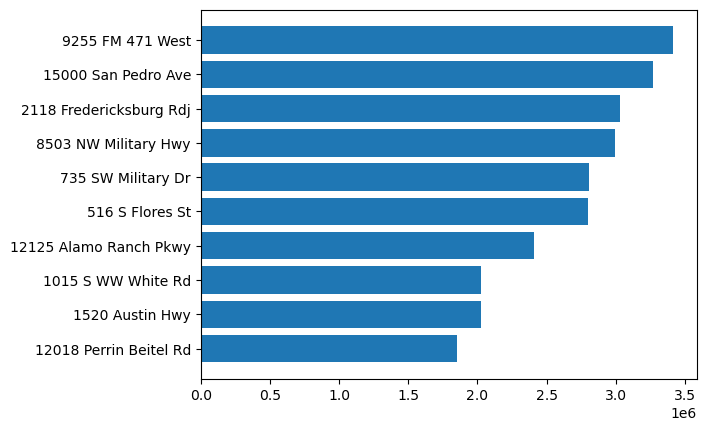

In [8]:
plt.barh(width=store_sums, y=store_sums.index)
plt.show()

### Yes, store location does affect total sales! Our top performing store is at 9255 FM 471 West.

### Do we have more total sales on certain days of the week?

In [10]:
day_sums = train.groupby('day_of_week').sales_total.sum()
day_sums

KeyError: 'day_of_week'

In [11]:
day_sums = day_sums.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_sums

day_of_week
Monday       16175493.46
Tuesday      18924016.28
Wednesday    18948380.83
Thursday     20284125.10
Friday       21540401.66
Saturday     22924358.67
Sunday       24292182.53
Name: sales_total, dtype: float64

In [12]:
day_sums.index = [day[:3] for day in day_sums.index]
day_sums

Mon    16175493.46
Tue    18924016.28
Wed    18948380.83
Thu    20284125.10
Fri    21540401.66
Sat    22924358.67
Sun    24292182.53
Name: sales_total, dtype: float64

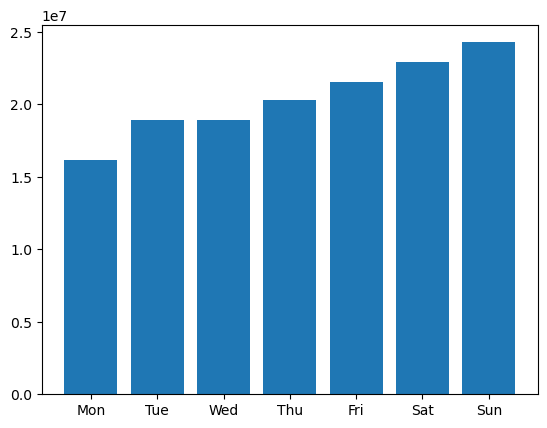

In [13]:
plt.bar(x=day_sums.index, height=day_sums)
plt.show()

### Yes, day of week affects total sales! Friday, Saturday, and Sunday have the most total sales! Monday is the worst performer.

### How does our target variable change over time?

In [14]:
day_sample = train.resample('d').sales_total.sum()
day_sample.head()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
Freq: D, Name: sales_total, dtype: float64

<Axes: xlabel='sale_date'>

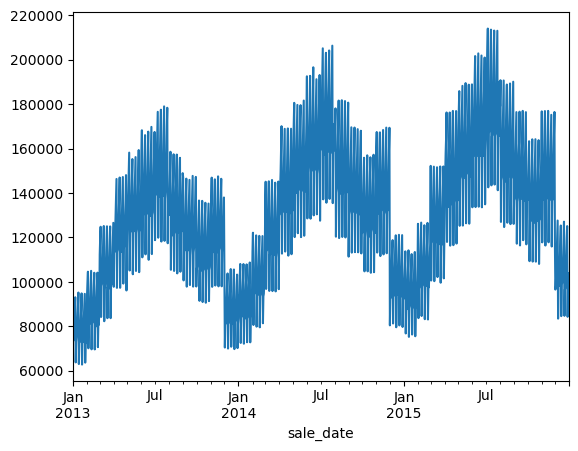

In [15]:
day_sample.plot()

### There is an upward trend in total sales year over year. There is seasonality in the data, which repeats itself over a period of one year.

In [16]:
month_sample = train.resample('m').sales_total.sum()
month_sample.head()

sale_date
2013-01-31    2447368.20
2013-02-28    2469765.97
2013-03-31    3319815.58
2013-04-30    3666901.23
2013-05-31    4102278.40
Freq: M, Name: sales_total, dtype: float64

<Axes: xlabel='sale_date'>

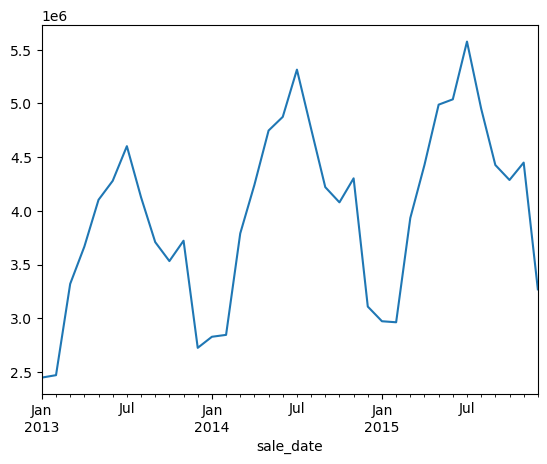

In [17]:
month_sample.plot()

### Resampling the data to be weekly instead of daily makes it easier to identify the trend.

In [18]:
day_sample.head()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
Freq: D, Name: sales_total, dtype: float64

In [19]:
day_sample.shift(-30)

sale_date
2013-01-01     79237.27
2013-01-02     94066.76
2013-01-03     98943.56
2013-01-04    104593.10
2013-01-05     70131.45
                ...    
2015-12-27          NaN
2015-12-28          NaN
2015-12-29          NaN
2015-12-30          NaN
2015-12-31          NaN
Freq: D, Name: sales_total, Length: 1095, dtype: float64

In [20]:
month_shift = pd.DataFrame({'now': day_sample,
                            'one_month_out': day_sample.shift(-30)})

month_shift.head()

,now,one_month_out
sale_date,,
2013-01-01,73844.01,79237.27
2013-01-02,73570.58,94066.76
2013-01-03,78169.48,98943.56
2013-01-04,84467.73,104593.10
2013-01-05,87621.85,70131.45


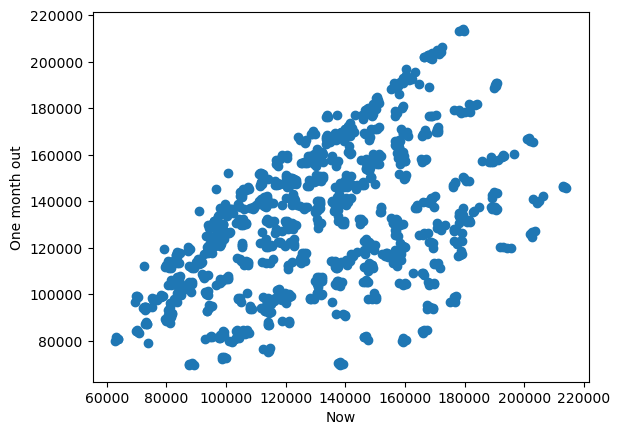

In [21]:
plt.scatter(x=month_shift.now, y=month_shift.one_month_out)
plt.xlabel('Now')
plt.ylabel('One month out')
plt.show()

In [22]:
half_shift = pd.DataFrame({'now': day_sample,
                           'half_year_out': day_sample.shift(-182)})

half_shift.head()

,now,half_year_out
sale_date,,
2013-01-01,73844.01,139006.90
2013-01-02,73570.58,139195.12
2013-01-03,78169.48,148207.22
2013-01-04,84467.73,157551.04
2013-01-05,87621.85,167910.51


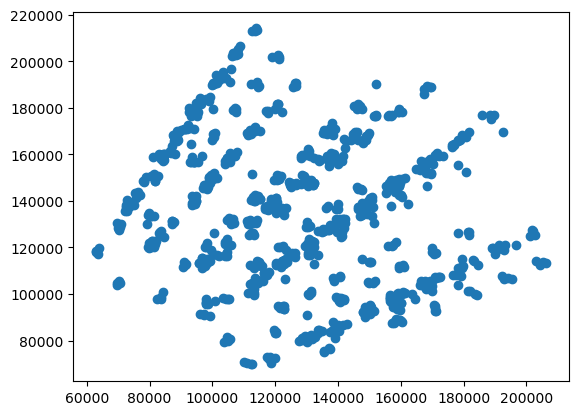

In [23]:
plt.scatter(x=half_shift.now, y=half_shift.half_year_out)
plt.show()

In [24]:
week_sample = train.resample('w').sales_total.sum()

### Autocorrelation plots can show us if past data points are able to predict future ones

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

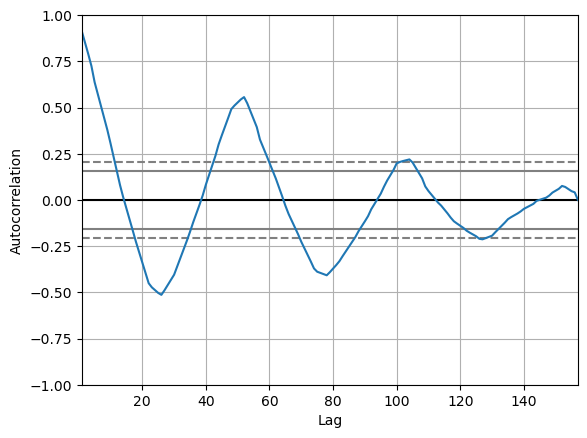

In [25]:
pd.plotting.autocorrelation_plot(week_sample)

### A seasonal decomposition plot isolates the trend, the seasonality, and the residuals.

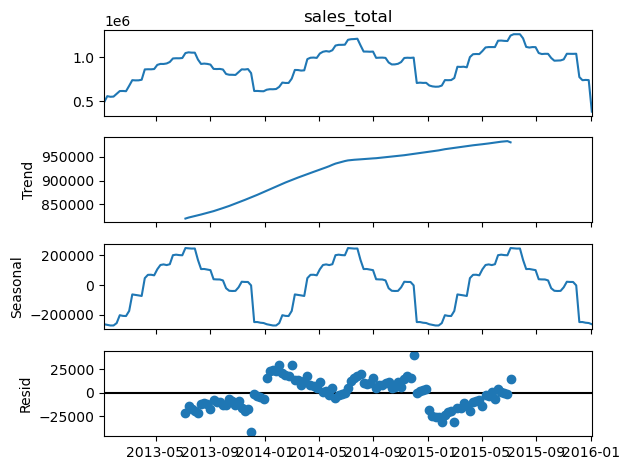

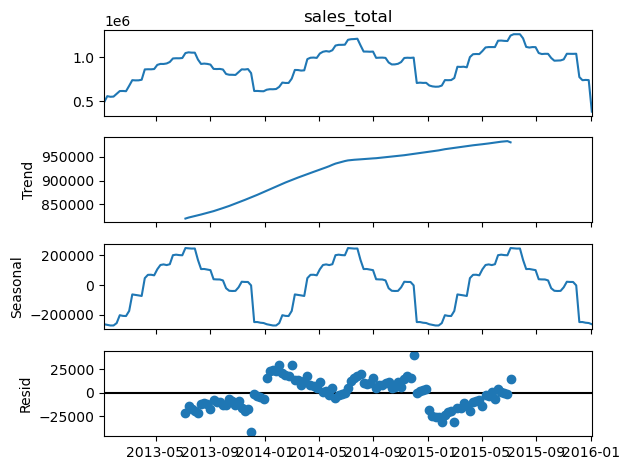

In [26]:
result = sm.tsa.seasonal_decompose(week_sample)
result.plot()